<a href="https://colab.research.google.com/github/bleonas/Computer_Vision_Test/blob/main/CV_Test_Bleona_Sejdini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

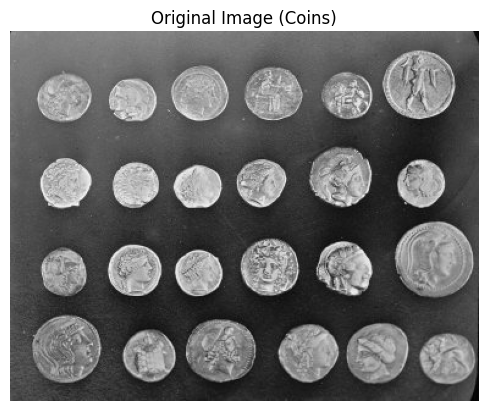

Image shape: (303, 384)
Pixel value range (in grayscale): 1 to 252


In [1]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

image = data.coins()

plt.imshow(image, cmap='gray')
plt.title('Original Image (Coins)')
plt.axis('off')
plt.show()

print(f"Image shape: {image.shape}")
print(f"Pixel value range (in grayscale): {image.min()} to {image.max()}")


2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

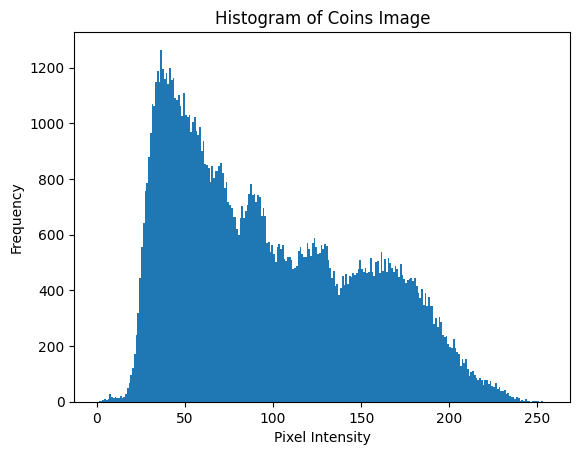

In [2]:

plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Coins Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


The histogram displays peaks corresponding to the background and the coins. The background, being darker, contributes to the lower intensity peaks, while the brighter coins contribute to the higher intensity peaks.


3. Applied noise to the image and use the correct function to erase the noise.


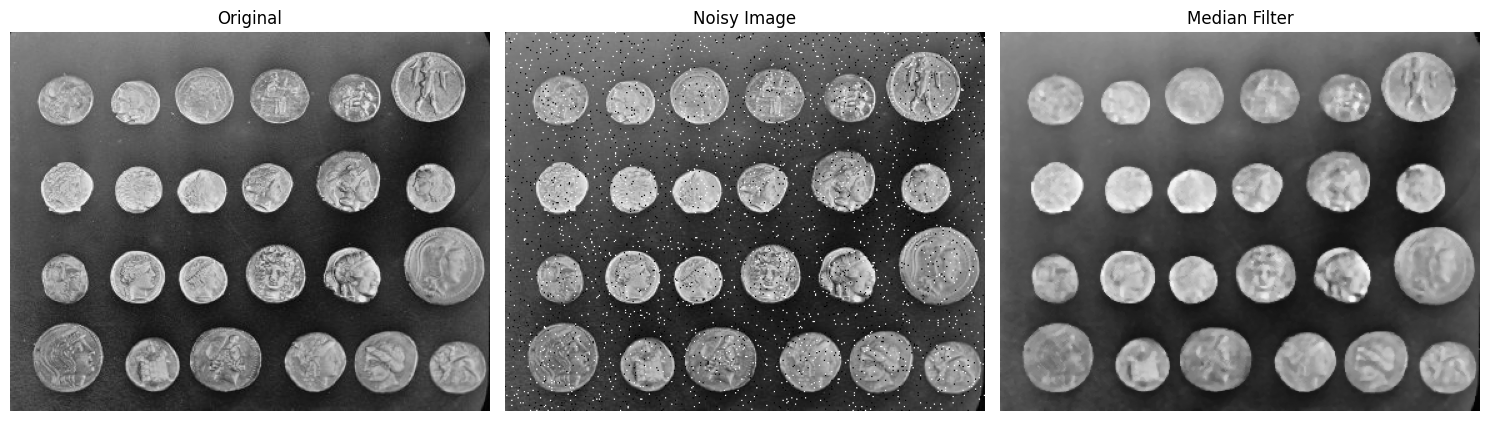

In [3]:
from skimage import img_as_ubyte
from skimage import filters, morphology
from skimage.util import random_noise

coins_noisy = random_noise(image, mode='s&p', amount=0.03)
coins_noisy = img_as_ubyte(coins_noisy)

coins_median = filters.median(coins_noisy, footprint=morphology.disk(2))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(coins_noisy, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(coins_median, cmap='gray')
axes[2].set_title('Median Filter')
axes[2].axis('off')

plt.tight_layout()
plt.show()

4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

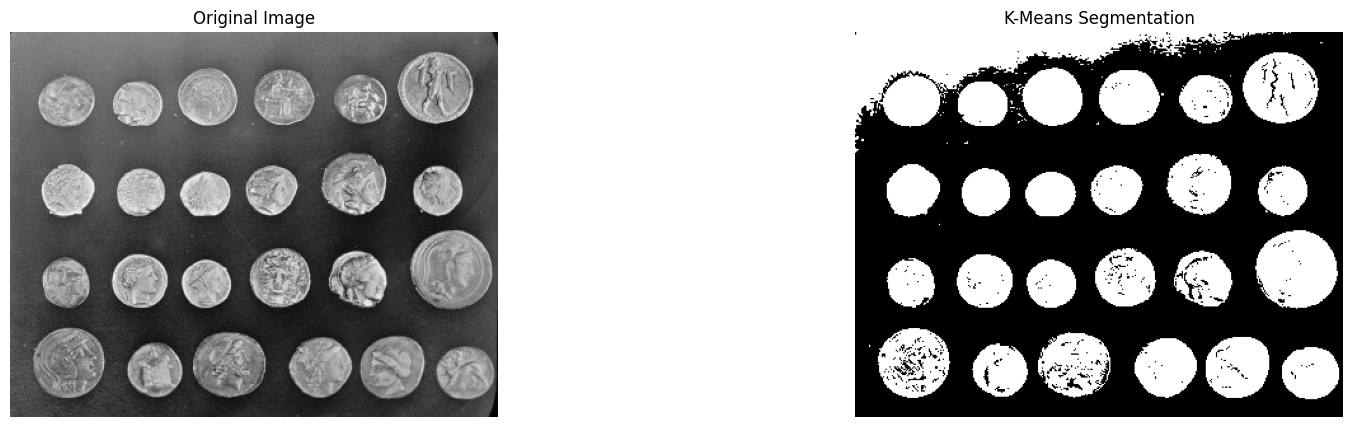

In [4]:
from sklearn.cluster import KMeans

pixels = image.reshape(-1, 1)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)
segmented = kmeans.labels_.reshape(image.shape)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

plt.imshow(segmented, cmap='gray')
plt.title('K-Means Segmentation')
plt.axis('off')
plt.show()


5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

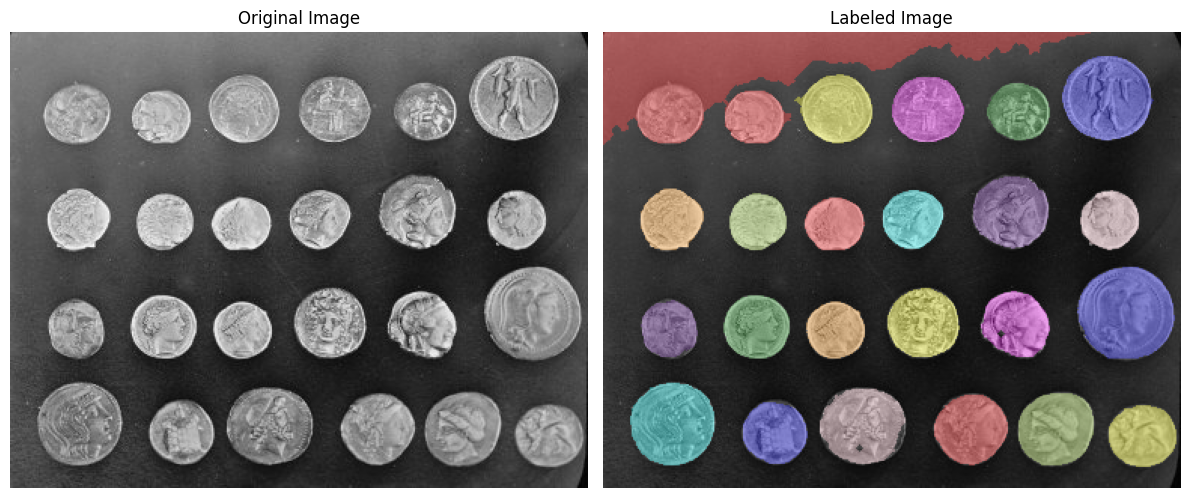

Number of coins detected: 23


In [5]:
from skimage.filters import threshold_otsu
import numpy as np
from skimage.measure import label, regionprops
from skimage.color import label2rgb


thresh = threshold_otsu(coins_median)
binary = coins_median > thresh
from skimage.morphology import remove_small_objects, closing, disk

cleaned = remove_small_objects(closing(binary, disk(2)), min_size=100)
from skimage.morphology import remove_small_objects, closing, disk

cleaned = remove_small_objects(closing(binary, disk(2)), min_size=100)
labels = label(cleaned)
image_label_overlay = label2rgb(labels, image=image, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_label_overlay)
axes[1].set_title('Labeled Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

regions = regionprops(labels)
num_coins = len(regions)
print(f"Number of coins detected: {num_coins}")


6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

Average area: 2055.48
Average major axis length: 57.96
Average orientation (radians): 0.15


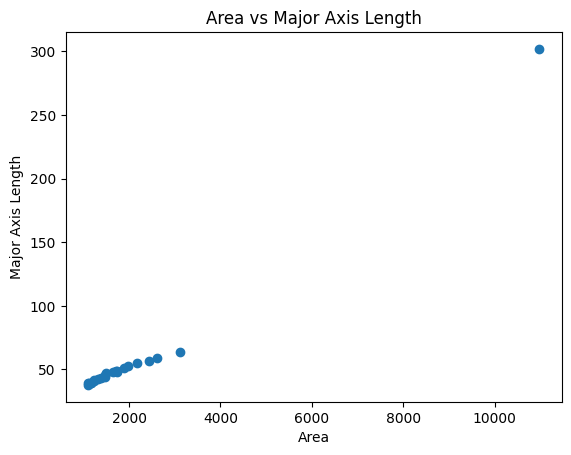

In [6]:
from skimage.measure import regionprops

regions = regionprops(labels)

areas = []
major_axis_lengths = []
orientations = []

for region in regions:
    areas.append(region.area)
    major_axis_lengths.append(region.major_axis_length)
    orientations.append(region.orientation)

avg_area = np.mean(areas)
avg_major_axis_length = np.mean(major_axis_lengths)
avg_orientation = np.mean(orientations)

print(f"Average area: {avg_area:.2f}")
print(f"Average major axis length: {avg_major_axis_length:.2f}")
print(f"Average orientation (radians): {avg_orientation:.2f}")

plt.scatter(areas, major_axis_lengths)
plt.title('Area vs Major Axis Length')
plt.xlabel('Area')
plt.ylabel('Major Axis Length')
plt.show()


7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [7]:
large_coins = [region for region in regions if region.area > 1750]
num_large_coins = len(large_coins)
print(f"Number of coins with area > 1750 pixels: {num_large_coins}")


Number of coins with area > 1750 pixels: 7


8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

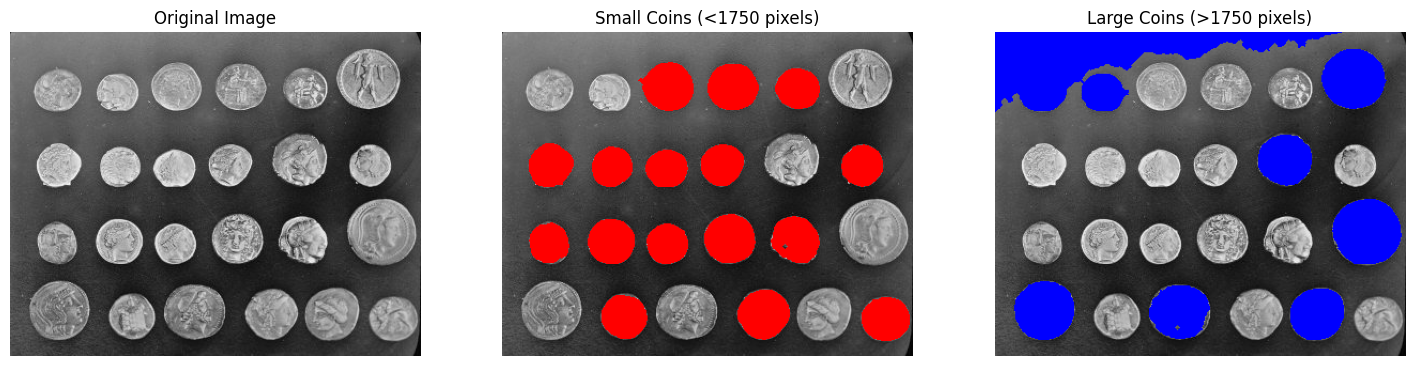

In [8]:
from skimage.color import gray2rgb

small_mask = np.zeros(image.shape, dtype=bool)
large_mask = np.zeros(image.shape, dtype=bool)

for region in regions:
    if region.area <= 1750:
        small_mask[tuple(region.coords.T)] = True
    else:
        large_mask[tuple(region.coords.T)] = True

image_rgb = gray2rgb(image)

small_highlight = image_rgb.copy()
large_highlight = image_rgb.copy()

small_highlight[small_mask] = [255, 0, 0]

large_highlight[large_mask] = [0, 0, 255]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(small_highlight)
axes[1].set_title('Small Coins (<1750 pixels)')
axes[1].axis('off')

axes[2].imshow(large_highlight)
axes[2].set_title('Large Coins (>1750 pixels)')
axes[2].axis('off')

plt.show()


9. Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

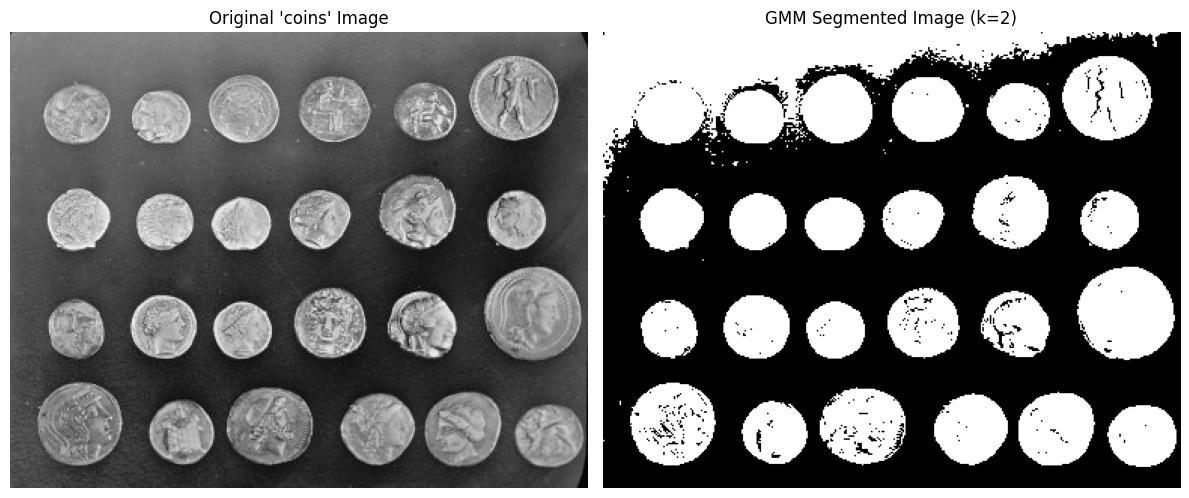

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.mixture import GaussianMixture


X = image.reshape(-1, 1)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

segmented = labels.reshape(image.shape)

if np.mean(image[segmented == 0]) > np.mean(image[segmented == 1]):
    segmented = 1 - segmented


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original 'coins' Image")
ax[0].axis('off')

ax[1].imshow(segmented, cmap='gray')
ax[1].set_title("GMM Segmented Image (k=2)")
ax[1].axis('off')

plt.tight_layout()
plt.show()

 The steps I followed to solve this exercise:

  Imported necessary libraries (NumPy, Matplotlib, skimage for data, sklearn for GMM).

  Loaded the grayscale coins image from skimage.data.

  Reshaped the image into a 2D array (pixels × 1 feature) to prepare it for clustering.

  Initialized and fited a Gaussian Mixture Model (GMM) with 2 components to the pixel intensity data.

  Predicted the cluster labels for each pixel using the trained GMM.

  Reshaped the labels back to the original image dimensions to get the segmented image.

  Checked cluster intensity ordering, and fliped the labels if necessary so that coins are the foreground.

  Visualized the original and segmented images side by side.


10. Extract the main texture features of this image

In [10]:
from skimage.feature import graycomatrix, graycoprops

glcm = graycomatrix(image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

print(f"Contrast: {contrast:.2f}")
print(f"Dissimilarity: {dissimilarity:.2f}")
print(f"Homogeneity: {homogeneity:.2f}")
print(f"Energy: {energy:.2f}")
print(f"Correlation: {correlation:.2f}")


Contrast: 1469.68
Dissimilarity: 20.30
Homogeneity: 0.13
Energy: 0.01
Correlation: 0.74


These texture features provide insights into the spatial distribution and relationship of pixel intensities in the image.


Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)

This course helped me expand my knowledge in Computer Vision, both in theory and practice. The explanation was very clear and it made the complex topics easier to understand. I truly appreciate the effort put into teaching us.